<a href="https://colab.research.google.com/github/eRuaro/prac-research/blob/main/iloilo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
path = '/content/drive/MyDrive/prac-research/actual/data/research-data-iloilo.csv'

import numpy as np
import pandas as pd
%matplotlib inline 
import matplotlib.pyplot as plt 
import sklearn

In [2]:
df = pd.read_csv(
    path, 
    low_memory=False,
    parse_dates=['time']
)

df.tail()

,name,region,country,longitude,latitude,time,temp_c,is_day,condition,wind_kph,wind_degree,wind_dir,air_pressure,precipitation,relative_humidity,cloud,feelslike_c,will_it_rain,chance_of_rain
523,Iloilo,Iloilo City,Philippines,122.56,10.7,2021-12-31 19:00:00,24.9,0,Cloudy,33.8,32,NNE,1011.92,0.36,89.2,88,27.3,0,2
524,Iloilo,Iloilo City,Philippines,122.56,10.7,2021-12-31 20:00:00,24.7,0,Light drizzle,33.8,33,NNE,1011.91,0.52,88.2,94,27.0,0,51
525,Iloilo,Iloilo City,Philippines,122.56,10.7,2021-12-31 21:00:00,24.5,0,Light drizzle,33.8,35,NE,1011.90,0.68,87.2,100,26.8,0,0
526,Iloilo,Iloilo City,Philippines,122.56,10.7,2021-12-31 22:00:00,24.4,0,Light drizzle,32.8,33,NNE,1012.59,0.50,87.6,100,26.7,0,51
527,Iloilo,Iloilo City,Philippines,122.56,10.7,2021-12-31 23:00:00,24.3,0,Overcast,31.7,32,NNE,1013.29,0.31,88.0,100,26.5,0,3


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528 entries, 0 to 527
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   name               528 non-null    object        
 1   region             528 non-null    object        
 2   country            528 non-null    object        
 3   longitude          528 non-null    float64       
 4   latitude           528 non-null    float64       
 5   time               528 non-null    datetime64[ns]
 6   temp_c             528 non-null    float64       
 7   is_day             528 non-null    int64         
 8   condition          528 non-null    object        
 9   wind_kph           528 non-null    float64       
 10  wind_degree        528 non-null    int64         
 11  wind_dir           528 non-null    object        
 12  air_pressure       528 non-null    float64       
 13  precipitation      528 non-null    float64       
 14  relative_h

In [4]:
df.time.head()

0   2021-12-10 00:00:00
1   2021-12-10 01:00:00
2   2021-12-10 02:00:00
3   2021-12-10 03:00:00
4   2021-12-10 04:00:00
Name: time, dtype: datetime64[ns]

In [5]:
df.sort_values(by=['time'], ascending=True)

df.time.head()

0   2021-12-10 00:00:00
1   2021-12-10 01:00:00
2   2021-12-10 02:00:00
3   2021-12-10 03:00:00
4   2021-12-10 04:00:00
Name: time, dtype: datetime64[ns]

## Feature Engineering

In [6]:
df['year'] = df.time.dt.year
df['month'] = df.time.dt.month
df['day'] = df.time.dt.day
df['hour'] = df.time.dt.hour
df['dayOfWeek'] = df.time.dt.dayofweek

df.head().T

,0,1,2,3,4
name,Iloilo,Iloilo,Iloilo,Iloilo,Iloilo
region,Iloilo City,Iloilo City,Iloilo City,Iloilo City,Iloilo City
country,Philippines,Philippines,Philippines,Philippines,Philippines
longitude,122.56,122.56,122.56,122.56,122.56
latitude,10.7,10.7,10.7,10.7,10.7
time,2021-12-10 00:00:00,2021-12-10 01:00:00,2021-12-10 02:00:00,2021-12-10 03:00:00,2021-12-10 04:00:00
temp_c,24.7,24.7,24.6,24.6,24.6
is_day,0,0,0,0,0
condition,Cloudy,Cloudy,Cloudy,Cloudy,Cloudy
wind_kph,24.8,24.7,24.6,24.5,24.8


In [7]:
df.tail().T

,523,524,525,526,527
name,Iloilo,Iloilo,Iloilo,Iloilo,Iloilo
region,Iloilo City,Iloilo City,Iloilo City,Iloilo City,Iloilo City
country,Philippines,Philippines,Philippines,Philippines,Philippines
longitude,122.56,122.56,122.56,122.56,122.56
latitude,10.7,10.7,10.7,10.7,10.7
time,2021-12-31 19:00:00,2021-12-31 20:00:00,2021-12-31 21:00:00,2021-12-31 22:00:00,2021-12-31 23:00:00
temp_c,24.9,24.7,24.5,24.4,24.3
is_day,0,0,0,0,0
condition,Cloudy,Light drizzle,Light drizzle,Light drizzle,Overcast
wind_kph,33.8,33.8,33.8,32.8,31.7


In [8]:
x_time = df['time']
df.drop(columns=['time'], inplace=True, axis=1)
df.head().T

,0,1,2,3,4
name,Iloilo,Iloilo,Iloilo,Iloilo,Iloilo
region,Iloilo City,Iloilo City,Iloilo City,Iloilo City,Iloilo City
country,Philippines,Philippines,Philippines,Philippines,Philippines
longitude,122.56,122.56,122.56,122.56,122.56
latitude,10.7,10.7,10.7,10.7,10.7
temp_c,24.7,24.7,24.6,24.6,24.6
is_day,0,0,0,0,0
condition,Cloudy,Cloudy,Cloudy,Cloudy,Cloudy
wind_kph,24.8,24.7,24.6,24.5,24.8
wind_degree,22,22,22,23,22


## Model driven EDA

In [9]:
from sklearn.ensemble import RandomForestRegressor 

model = RandomForestRegressor(
    n_jobs=1,
    random_state=42
)

### Turning data into pandas categories

In [10]:
for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

name
region
country
condition
wind_dir


In [11]:
for label, content in df.items(): 
    if pd.api.types.is_string_dtype(content):
        df[label] = content.astype('category').cat.as_ordered()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528 entries, 0 to 527
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   name               528 non-null    category
 1   region             528 non-null    category
 2   country            528 non-null    category
 3   longitude          528 non-null    float64 
 4   latitude           528 non-null    float64 
 5   temp_c             528 non-null    float64 
 6   is_day             528 non-null    int64   
 7   condition          528 non-null    category
 8   wind_kph           528 non-null    float64 
 9   wind_degree        528 non-null    int64   
 10  wind_dir           528 non-null    category
 11  air_pressure       528 non-null    float64 
 12  precipitation      528 non-null    float64 
 13  relative_humidity  528 non-null    float64 
 14  cloud              528 non-null    int64   
 15  feelslike_c        528 non-null    float64 
 16  will_it_

In [13]:
print(f'{df.isnull().sum() / len(df) * 100}%')

name                 0.0
region               0.0
country              0.0
longitude            0.0
latitude             0.0
temp_c               0.0
is_day               0.0
condition            0.0
wind_kph             0.0
wind_degree          0.0
wind_dir             0.0
air_pressure         0.0
precipitation        0.0
relative_humidity    0.0
cloud                0.0
feelslike_c          0.0
will_it_rain         0.0
chance_of_rain       0.0
year                 0.0
month                0.0
day                  0.0
hour                 0.0
dayOfWeek            0.0
dtype: float64%


In [14]:


# Check if there is any null numeric values
for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [15]:


# Check for columns which aren't numeric
for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)



name
region
country
condition
wind_dir


In [16]:
# Turns categorical variables into numbers and fills missing
for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        #add binary column to indicate whether sample has missing value
        df[label+'_is_missing'] = pd.isnull(content)
        #turns categories into numbers and add + 1
        # Add 1 to avoid having -1 values in the data (ie, missing values)
        df[label] = pd.Categorical(content).codes + 1


In [17]:
df.isna().sum()

name                    0
region                  0
country                 0
longitude               0
latitude                0
temp_c                  0
is_day                  0
condition               0
wind_kph                0
wind_degree             0
wind_dir                0
air_pressure            0
precipitation           0
relative_humidity       0
cloud                   0
feelslike_c             0
will_it_rain            0
chance_of_rain          0
year                    0
month                   0
day                     0
hour                    0
dayOfWeek               0
name_is_missing         0
region_is_missing       0
country_is_missing      0
condition_is_missing    0
wind_dir_is_missing     0
dtype: int64

In [18]:
df.head()

,name,region,country,longitude,latitude,temp_c,is_day,condition,wind_kph,wind_degree,wind_dir,air_pressure,precipitation,relative_humidity,cloud,feelslike_c,will_it_rain,chance_of_rain,year,month,day,hour,dayOfWeek,name_is_missing,region_is_missing,country_is_missing,condition_is_missing,wind_dir_is_missing
0,1,1,1,122.56,10.7,24.7,0,2,24.8,22,6,1010.96,0.02,79.70,63,27.2,0,0,2021,12,10,0,4,False,False,False,False,False
1,1,1,1,122.56,10.7,24.7,0,2,24.7,22,6,1010.72,0.02,76.93,64,27.2,0,2,2021,12,10,1,4,False,False,False,False,False
2,1,1,1,122.56,10.7,24.6,0,2,24.6,22,6,1010.47,0.02,74.17,64,27.1,0,2,2021,12,10,2,4,False,False,False,False,False
3,1,1,1,122.56,10.7,24.6,0,2,24.5,23,6,1010.22,0.02,71.40,65,27.1,0,0,2021,12,10,3,4,False,False,False,False,False
4,1,1,1,122.56,10.7,24.6,0,2,24.8,22,6,1009.57,0.03,72.53,63,27.1,0,2,2021,12,10,4,4,False,False,False,False,False


In [19]:
df.drop(columns=['region', 'region_is_missing', 'name_is_missing', 'country_is_missing', 'condition_is_missing', 'wind_dir_is_missing'], inplace=True, axis=1)

df.head()

,name,country,longitude,latitude,temp_c,is_day,condition,wind_kph,wind_degree,wind_dir,air_pressure,precipitation,relative_humidity,cloud,feelslike_c,will_it_rain,chance_of_rain,year,month,day,hour,dayOfWeek
0,1,1,122.56,10.7,24.7,0,2,24.8,22,6,1010.96,0.02,79.70,63,27.2,0,0,2021,12,10,0,4
1,1,1,122.56,10.7,24.7,0,2,24.7,22,6,1010.72,0.02,76.93,64,27.2,0,2,2021,12,10,1,4
2,1,1,122.56,10.7,24.6,0,2,24.6,22,6,1010.47,0.02,74.17,64,27.1,0,2,2021,12,10,2,4
3,1,1,122.56,10.7,24.6,0,2,24.5,23,6,1010.22,0.02,71.40,65,27.1,0,0,2021,12,10,3,4
4,1,1,122.56,10.7,24.6,0,2,24.8,22,6,1009.57,0.03,72.53,63,27.1,0,2,2021,12,10,4,4


### Train and Test Sets

In [20]:
HORIZON = 1
WINDOW = 7

for i in range(WINDOW): # Shift values for each step in WINDOW_SIZE
    df[f"precipitation+{i+1}"] = df["precipitation"].shift(periods=i+1)
df.head()

,name,country,longitude,latitude,temp_c,is_day,condition,wind_kph,wind_degree,wind_dir,air_pressure,precipitation,relative_humidity,cloud,feelslike_c,will_it_rain,chance_of_rain,year,month,day,hour,dayOfWeek,precipitation+1,precipitation+2,precipitation+3,precipitation+4,precipitation+5,precipitation+6,precipitation+7
0,1,1,122.56,10.7,24.7,0,2,24.8,22,6,1010.96,0.02,79.70,63,27.2,0,0,2021,12,10,0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,122.56,10.7,24.7,0,2,24.7,22,6,1010.72,0.02,76.93,64,27.2,0,2,2021,12,10,1,4,0.02,NaN,NaN,NaN,NaN,NaN,NaN
2,1,1,122.56,10.7,24.6,0,2,24.6,22,6,1010.47,0.02,74.17,64,27.1,0,2,2021,12,10,2,4,0.02,0.02,NaN,NaN,NaN,NaN,NaN
3,1,1,122.56,10.7,24.6,0,2,24.5,23,6,1010.22,0.02,71.40,65,27.1,0,0,2021,12,10,3,4,0.02,0.02,0.02,NaN,NaN,NaN,NaN
4,1,1,122.56,10.7,24.6,0,2,24.8,22,6,1009.57,0.03,72.53,63,27.1,0,2,2021,12,10,4,4,0.02,0.02,0.02,0.02,NaN,NaN,NaN


In [21]:
X = df.dropna().drop("precipitation", axis=1).astype(np.float32) 
y = df.dropna()["precipitation"].astype(np.float32)
X.head()

,name,country,longitude,latitude,temp_c,is_day,condition,wind_kph,wind_degree,wind_dir,air_pressure,relative_humidity,cloud,feelslike_c,will_it_rain,chance_of_rain,year,month,day,hour,dayOfWeek,precipitation+1,precipitation+2,precipitation+3,precipitation+4,precipitation+5,precipitation+6,precipitation+7
7,1.0,1.0,122.559998,10.7,25.500000,1.0,9.0,27.500000,23.0,6.0,1008.340027,76.570000,64.0,28.299999,0.0,1.0,2021.0,12.0,10.0,7.0,4.0,0.05,0.04,0.03,0.02,0.02,0.02,0.02
8,1.0,1.0,122.559998,10.7,26.400000,1.0,2.0,29.400000,24.0,6.0,1008.409973,78.330002,67.0,29.500000,0.0,2.0,2021.0,12.0,10.0,8.0,4.0,0.05,0.05,0.04,0.03,0.02,0.02,0.02
9,1.0,1.0,122.559998,10.7,27.200001,1.0,2.0,31.299999,25.0,6.0,1008.479980,80.099998,70.0,30.700001,0.0,0.0,2021.0,12.0,10.0,9.0,4.0,0.05,0.05,0.05,0.04,0.03,0.02,0.02
10,1.0,1.0,122.559998,10.7,27.700001,1.0,2.0,31.700001,26.0,6.0,1009.020020,80.599998,73.0,31.600000,0.0,2.0,2021.0,12.0,10.0,10.0,4.0,0.05,0.05,0.05,0.05,0.04,0.03,0.02
11,1.0,1.0,122.559998,10.7,28.299999,1.0,2.0,32.000000,28.0,6.0,1009.559998,81.099998,75.0,32.500000,0.0,2.0,2021.0,12.0,10.0,11.0,4.0,0.07,0.05,0.05,0.05,0.05,0.04,0.03


In [22]:
y.head()

7     0.05
8     0.05
9     0.05
10    0.07
11    0.09
Name: precipitation, dtype: float32

In [23]:
# Make train and test sets
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_columns = X.columns
X_time_train, X_time_test = x_time[:split_size], x_time[split_size:]
X_time_test = X_time_test[7:]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test), len(X_time_train), len(X_time_test)

(416, 416, 105, 105, 416, 105)

### Baseline model

In [24]:
# Create a naïve forecast
naive_forecast = y_test[:-1] # Naïve forecast equals every value excluding the last value
naive_forecast[:10], naive_forecast[-10:] # View frist 10 and last 10 

(423    0.08
 424    0.06
 425    0.03
 426    0.01
 427    0.01
 428    0.00
 429    0.00
 430    0.00
 431    0.00
 432    0.00
 Name: precipitation, dtype: float32, 517    0.55
 518    0.37
 519    0.18
 520    0.19
 521    0.19
 522    0.19
 523    0.36
 524    0.52
 525    0.68
 526    0.50
 Name: precipitation, dtype: float32)

In [25]:
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  """
  Plots a timesteps (a series of points in time) against values (a series of values across timesteps).
  
  Parameters
  ---------
  timesteps : array of timesteps
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot (setting a value will index from end of timesteps & values)
  label : label to show on plot of values
  """
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("Hourly Rain Precipitation")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)

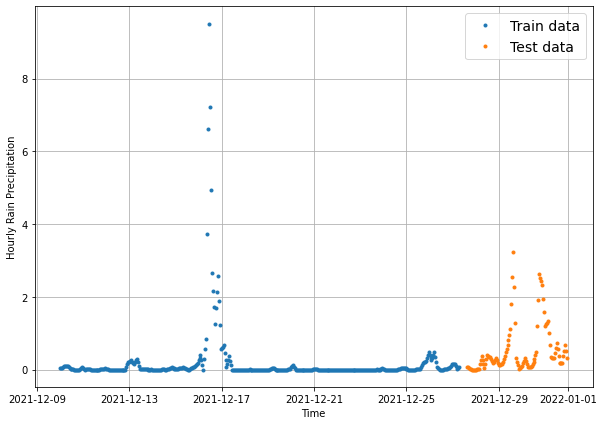

In [26]:
# Try out our plotting function
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_time_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_time_test, values=y_test, label="Test data")

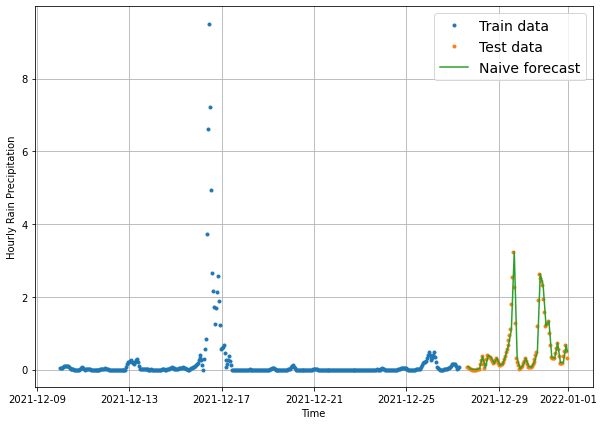

In [27]:
# Plot naive forecast
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_time_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_time_test, values=y_test, label="Test data")
plot_time_series(timesteps=X_time_test[1:], values=naive_forecast, format="-", label="Naive forecast");

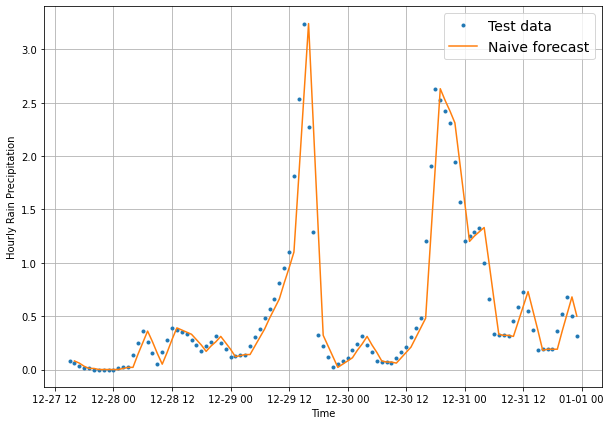

In [28]:
plt.figure(figsize=(10, 7))
offset = 10 # offset the values by 300 timesteps 
plot_time_series(timesteps=X_time_test,  values=y_test, label="Test data")
plot_time_series(timesteps=X_time_test[1:], values=naive_forecast, format="-",  label="Naive forecast");

In [29]:
import tensorflow as tf
# MASE implemented courtesy of sktime - https://github.com/alan-turing-institute/sktime/blob/ee7a06843a44f4aaec7582d847e36073a9ab0566/sktime/performance_metrics/forecasting/_functions.py#L16
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE (assuming no seasonality of data).
  """
  mae = tf.reduce_mean(tf.abs(y_true - y_pred))

  # Find MAE of naive forecast (no seasonality)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # our seasonality is 1 day (hence the shifting of 1 day)

  return mae / mae_naive_no_season
def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  # train_mae = tf.keras.metrics.mean_absolute_error(y_train, )
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred) # puts and emphasis on outliers (all errors get squared)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  
  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),}

In [30]:
naive_results = evaluate_preds(y_true=y_test[1:],
                               y_pred=naive_forecast)
naive_results

{'mae': 0.14913462, 'mape': 96193.86, 'mse': 0.07065482, 'rmse': 0.26580974}

### RandomForestRegressor

In [31]:
# Reducing data using max_samples
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)
model = RandomForestRegressor(
    n_jobs=-1,
    # random_state=42,
    # max_samples=10000, #minimizes the data
)

X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [32]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((416, 28), (416,), (105, 28), (105,))

In [33]:
from tensorflow.python.ops.gen_math_ops import sqrt
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

def show_scores_sklearn(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_test) 

    train_mae =  mean_absolute_error(y_train, train_preds)
    mae = mean_absolute_error(y_test, val_preds)
    train_mse = mean_squared_error(y_train, train_preds)
    mse = mean_squared_error(y_test, val_preds)
    train_rmse = sqrt(train_mse)
    rmse = sqrt(mse)
    train_mape = mean_absolute_percentage_error(y_train, train_preds)
    mape = mean_absolute_percentage_error(y_test, val_preds)
    return {"mae": mae,
            "train_mae": train_mae,
          "mse": mse,
          "train_mse": train_mse,
          "rmse": rmse.numpy(),
          "train_rmse": train_rmse.numpy(),
          "mape": mape,
          "train_mape": train_mape
          }

# Score model
random_forest = show_scores_sklearn(model)
random_forest

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


{'mae': 0.2478200015287314,
 'mape': 1749970117785.0205,
 'mse': 0.2494405640881407,
 'rmse': 0.499440250768939,
 'train_mae': 0.021465384258637924,
 'train_mape': 4686558362135.72,
 'train_mse': 0.01312147146056339,
 'train_rmse': 0.11454899153010205}

In [34]:
model.score(X_train, y_train), model.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


(0.9785382660426064, 0.47496818990773015)

In [35]:
train_preds = model.predict(X_train)
val_preds = model.predict(X_test) 

mean_absolute_error(y_test, val_preds)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


0.2478200015287314

In [36]:
naive_results

{'mae': 0.14913462, 'mape': 96193.86, 'mse': 0.07065482, 'rmse': 0.26580974}

#### Parameter Tuning

In [37]:


from sklearn.model_selection import RandomizedSearchCV

rf_grid = {
    'n_estimators': np.arange(10, 100, 10),
    'max_depth': [None, 3, 5, 10],
    'min_samples_split': np.arange(2, 20, 2),
    'min_samples_leaf': np.arange(1, 20, 2),
    'max_features': [0.5, 1, 'sqrt', 'auto'],
    'max_samples': [332]
}

np.random.seed(42)
#instantiate ranomdized search cv model
rs_model = RandomizedSearchCV(
    RandomForestRegressor(
        n_jobs=-1,
    ),
    param_distributions=rf_grid,
    n_iter=30,
    cv=5,
    verbose=True
)

#Fit the randomized search cv model
rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1), n_iter=30,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [332],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [38]:
rs_model.score(X_train, y_train), rs_model.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


(0.8067216394366622, 0.5712693980343836)

In [39]:
random_forest_ideal = show_scores_sklearn(rs_model)
random_forest_ideal

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


{'mae': 0.2270491824586869,
 'mape': 1045875058468.6472,
 'mse': 0.20368823591347196,
 'rmse': 0.45131833101866353,
 'train_mae': 0.062131569636054707,
 'train_mape': 7470532577723.051,
 'train_mse': 0.11816829418867306,
 'train_rmse': 0.3437561551284181}

In [40]:
mae = []
mape = []
mse = []
rmse = []

In [41]:
mae.append(naive_results['mae'])
mae.append(random_forest['mae'])
mae.append(random_forest_ideal['mae'])

mape.append(naive_results['mape'])
mape.append(random_forest['mape'])
mape.append(random_forest_ideal['mape'])

mse.append(naive_results['mse'])
mse.append(random_forest['mse'])
mse.append(random_forest_ideal['mse'])

rmse.append(naive_results['rmse'])
rmse.append(random_forest['rmse'])
rmse.append(random_forest_ideal['rmse'])

In [42]:
models = []

In [43]:
models.append('Naive')
models.append('Random Forest')
models.append('Random Forest Randomized Search')

In [44]:
scores = pd.DataFrame(
    data={
        'models': models,
        'mae': mae,
        'mape': mape,
        'mse': mse,
        'rmse': rmse,
    }    
)

scores

,models,mae,mape,mse,rmse
0,Naive,0.149135,9.619386e+04,0.070655,0.265810
1,Random Forest,0.247820,1.749970e+12,0.249441,0.499440
2,Random Forest Randomized Search,0.227049,1.045875e+12,0.203688,0.451318


### KNeighboursRegressor


In [45]:
from sklearn.neighbors import KNeighborsRegressor

In [46]:
np.random.seed(42)
k_model = KNeighborsRegressor(
    n_jobs=-1,
    #n_neighbors=2,
    # random_state=42,
    # max_samples=10000, #minimizes the data
)

# X_train = np.asarray(X_train)
# y_train = np.asarray(y_train)
k_model.fit(X_train, y_train)

KNeighborsRegressor(n_jobs=-1)

In [47]:
k_model.score(X_train, y_train), k_model.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


(0.5127933546754293, -0.3612531479232701)

In [48]:
k_scores = show_scores_sklearn(k_model)
k_scores

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


{'mae': 0.46554285,
 'mape': 11666468000000.0,
 'mse': 0.64672613,
 'rmse': 0.80419284,
 'train_mae': 0.11971635,
 'train_mape': 123069520000000.0,
 'train_mse': 0.29787284,
 'train_rmse': 0.54577726}

In [49]:
rf_k_params = {
    'n_neighbors': [1, 3, 5, 10, 20],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [20, 30, 40, 50, 60]
}

np.random.seed(42)
rs_k_model = RandomizedSearchCV(
    KNeighborsRegressor(
        n_jobs=-1,
        #random_state=42,
    ),
    param_distributions=rf_k_params,
    n_iter=30,
    cv=5,
    verbose=True
)

#Fit the randomized search cv model
rs_k_model.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


RandomizedSearchCV(cv=5, estimator=KNeighborsRegressor(n_jobs=-1), n_iter=30,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'leaf_size': [20, 30, 40, 50, 60],
                                        'n_neighbors': [1, 3, 5, 10, 20]},
                   verbose=True)

In [50]:
rs_k_model.score(X_train, y_train), rs_k_model.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


(0.18966865124343713, -0.2552710866570096)

In [51]:
knr_ideal = show_scores_sklearn(rs_k_model)
knr_ideal

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


{'mae': 0.43633336,
 'mape': 12953209000000.0,
 'mse': 0.59637445,
 'rmse': 0.77225286,
 'train_mae': 0.17568868,
 'train_mape': 178758250000000.0,
 'train_mse': 0.4954278,
 'train_rmse': 0.7038663}

In [52]:
models.append('KNeighboursRegressor')
models.append('KNeighboursRegressor Randomized Search')

mae.append(k_scores['mae'])
mape.append(k_scores['mape'])
mse.append(k_scores['mse']) 
rmse.append(k_scores['rmse'])

mae.append(knr_ideal['mae'])
mape.append(knr_ideal['mape'])
mse.append(knr_ideal['mse']) 
rmse.append(knr_ideal['rmse']) 

scores = pd.DataFrame(
    data={
        'models': models,
        'mae': mae,
        'mape': mape,
        'mse': mse,
        'rmse': rmse,
    }    
)

scores

,models,mae,mape,mse,rmse
0,Naive,0.149135,9.619386e+04,0.070655,0.265810
1,Random Forest,0.247820,1.749970e+12,0.249441,0.499440
2,Random Forest Randomized Search,0.227049,1.045875e+12,0.203688,0.451318
3,KNeighboursRegressor,0.465543,1.166647e+13,0.646726,0.804193
4,KNeighboursRegressor Randomized Search,0.436333,1.295321e+13,0.596374,0.772253


### Support Vector Regressor

In [53]:
from sklearn.svm import SVR

In [54]:
np.random.seed(42)
svr_model = SVR()

# X_train = np.asarray(X_train)|
# y_train = np.asarray(y_train)
svr_model.fit(X_train, y_train)

SVR()

In [55]:
svr_model.score(X_train, y_train), svr_model.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVR was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


(0.0010850874192736004, -0.38572991466620543)

In [56]:
svr_scores = show_scores_sklearn(svr_model)
svr_scores

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVR was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


{'mae': 0.4589229107859985,
 'mape': 21296326374310.56,
 'mse': 0.6583548747787358,
 'rmse': 0.8113907041485845,
 'train_mae': 0.20931614938591062,
 'train_mape': 218761079399186.8,
 'train_mse': 0.6107257476483504,
 'train_rmse': 0.7814894418022232}

In [57]:
rf_svr_params = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto'],
    'degree': [1, 3, 5, 7, 9],
    'epsilon': [0.1, 0.3, 0.5, 0.7, 0.9],
    'C': [1, 3, 5, 7, 9], 
}

np.random.seed(42)
rs_svr_model = RandomizedSearchCV(
    SVR(),
    param_distributions=rf_svr_params,
    n_iter=5,
    cv=5,
    verbose=True
)

# X_train = np.asarray(X_train)
# y_train = np.asarray(y_train)
#Fit the randomized search cv model
rs_svr_model.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5, estimator=SVR(), n_iter=5,
                   param_distributions={'C': [1, 3, 5, 7, 9],
                                        'degree': [1, 3, 5, 7, 9],
                                        'epsilon': [0.1, 0.3, 0.5, 0.7, 0.9],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']},
                   verbose=True)

In [58]:
rs_svr_model.score(X_train, y_train), rs_svr_model.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVR was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


(0.0910875115511931, -0.0006375251246413249)

In [59]:
rs_svr_scores = show_scores_sklearn(rs_svr_model)
rs_svr_scores

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVR was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


{'mae': 0.5065153666240702,
 'mape': 121225731427091.22,
 'mse': 0.475398983293958,
 'rmse': 0.6894918297514178,
 'train_mae': 0.5247609076693992,
 'train_mape': 1141505954683854.5,
 'train_mse': 0.5556992413104661,
 'train_rmse': 0.7454523736030801}

In [60]:
models.append('Support Vector Regression')
models.append('Support Vector Regression Randomized Search')

mae.append(svr_scores['mae'])
mape.append(svr_scores['mape'])
mse.append(svr_scores['mse']) 
rmse.append(svr_scores['rmse'])

mae.append(rs_svr_scores['mae'])
mape.append(rs_svr_scores['mape'])
mse.append(rs_svr_scores['mse']) 
rmse.append(rs_svr_scores['rmse']) 

scores = pd.DataFrame(
    data={
        'models': models,
        'mae': mae,
        'mape': mape,
        'mse': mse,
        'rmse': rmse,
    }    
)

scores

,models,mae,mape,mse,rmse
0,Naive,0.149135,9.619386e+04,0.070655,0.265810
1,Random Forest,0.247820,1.749970e+12,0.249441,0.499440
2,Random Forest Randomized Search,0.227049,1.045875e+12,0.203688,0.451318
3,KNeighboursRegressor,0.465543,1.166647e+13,0.646726,0.804193
4,KNeighboursRegressor Randomized Search,0.436333,1.295321e+13,0.596374,0.772253
5,Support Vector Regression,0.458923,2.129633e+13,0.658355,0.811391
6,Support Vector Regression Randomized Search,0.506515,1.212257e+14,0.475399,0.689492


### Ensemble Methods

#### Combining RFR, KNR, and SVR

In [61]:
from sklearn.ensemble import VotingRegressor

In [62]:
vr_model = VotingRegressor(
    estimators=[
        ('rfr', rs_model),
        ('knr', rs_k_model),
        ('svr', rs_svr_model),
    ]
)

np.random.seed(42)
# X_train_dot = np.dot(X_train, X_train.T)
# X_test_dot = np.dot(X_test, X_train.T)
vr_model.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits


VotingRegressor(estimators=[('rfr',
                             RandomizedSearchCV(cv=5,
                                                estimator=RandomForestRegressor(n_jobs=-1),
                                                n_iter=30,
                                                param_distributions={'max_depth': [None,
                                                                                   3,
                                                                                   5,
                                                                                   10],
                                                                     'max_features': [0.5,
                                                                                      1,
                                                                                      'sqrt',
                                                                                      'auto'],
                                         

In [63]:
vr_model.score(X_train, y_train), vr_model.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVR was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


(0.45308560916830376, 0.2205026491437836)

In [64]:
vr_scores = show_scores_sklearn(vr_model)
vr_scores

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVR was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


{'mae': 0.33417792167128213,
 'mape': 38231150786059.664,
 'mse': 0.3703361494775242,
 'rmse': 0.6085525034682909,
 'train_mae': 0.22501270309944532,
 'train_mape': 409456056008470.94,
 'train_mse': 0.3343775290904336,
 'train_rmse': 0.578253862149172}

In [65]:
models.append('VotingRegressor')

mae.append(vr_scores['mae'])
mape.append(vr_scores['mape'])
mse.append(vr_scores['mse']) 
rmse.append(vr_scores['rmse'])

scores = pd.DataFrame(
    data={
        'models': models,
        'mae': mae,
        'mape': mape,
        'mse': mse,
        'rmse': rmse,
    }    
)

scores

,models,mae,mape,mse,rmse
0,Naive,0.149135,9.619386e+04,0.070655,0.265810
1,Random Forest,0.247820,1.749970e+12,0.249441,0.499440
2,Random Forest Randomized Search,0.227049,1.045875e+12,0.203688,0.451318
3,KNeighboursRegressor,0.465543,1.166647e+13,0.646726,0.804193
4,KNeighboursRegressor Randomized Search,0.436333,1.295321e+13,0.596374,0.772253
5,Support Vector Regression,0.458923,2.129633e+13,0.658355,0.811391
6,Support Vector Regression Randomized Search,0.506515,1.212257e+14,0.475399,0.689492
7,VotingRegressor,0.334178,3.823115e+13,0.370336,0.608553


#### GradientTreeBoosting Regressor

In [66]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor

In [67]:
np.random.seed(42)
gbr_model = GradientBoostingRegressor()

gbr_model.fit(X_train, y_train)

GradientBoostingRegressor()

In [68]:
gbr_scores = show_scores_sklearn(gbr_model)
gbr_scores

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


{'mae': 0.3232404915765161,
 'mape': 2263976343384.8643,
 'mse': 0.5147214766493315,
 'rmse': 0.7174409220621106,
 'train_mae': 0.006485155274150088,
 'train_mape': 5206056670667.829,
 'train_mse': 0.0001109474056763794,
 'train_rmse': 0.010533157440975589}

In [69]:
models.append('GradientTreeBoosting Regressor')

mae.append(gbr_scores['mae'])
mape.append(gbr_scores['mape'])
mse.append(gbr_scores['mse']) 
rmse.append(gbr_scores['rmse'])

scores = pd.DataFrame(
    data={
        'models': models,
        'mae': mae,
        'mape': mape,
        'mse': mse,
        'rmse': rmse,
    }    
)

scores

,models,mae,mape,mse,rmse
0,Naive,0.149135,9.619386e+04,0.070655,0.265810
1,Random Forest,0.247820,1.749970e+12,0.249441,0.499440
2,Random Forest Randomized Search,0.227049,1.045875e+12,0.203688,0.451318
3,KNeighboursRegressor,0.465543,1.166647e+13,0.646726,0.804193
4,KNeighboursRegressor Randomized Search,0.436333,1.295321e+13,0.596374,0.772253
5,Support Vector Regression,0.458923,2.129633e+13,0.658355,0.811391
6,Support Vector Regression Randomized Search,0.506515,1.212257e+14,0.475399,0.689492
7,VotingRegressor,0.334178,3.823115e+13,0.370336,0.608553
8,GradientTreeBoosting Regressor,0.323240,2.263976e+12,0.514721,0.717441


In [70]:
np.random.seed(42)
rf_gbr_params = {
    'loss' : ['squared_error', 'absolute_error', 'huber', 'quantile'],
    'n_estimators': [100, 200, 400, 800, 1000, 1600],
    'criterion': ['friedman_mse', 'squared_error', 'absolute_error'],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [1, 3, 5, 10, 20, 50],
    'min_samples_leaf': [1, 5, 10, 20],
    'learning_rate': [0.1, 0.001, 0.005, 0.0001]
}

rs_gbr_model = RandomizedSearchCV(
    GradientBoostingRegressor(),
    param_distributions=rf_gbr_params,
    n_iter=5,
    cv=5,
    verbose=True
)

#Fit the randomized search cv model
rs_gbr_model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1859: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). The correct way of minimizing the absolute error is to use  loss='absolute_error' instead.
  FutureWarning,


Fitting 5 folds for each of 5 candidates, totalling 25 fits


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1859: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). The correct way of minimizing the absolute error is to use  loss='absolute_error' instead.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1859: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). The correct way of minimizing the absolute error is to use  loss='absolute_error' instead.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1859: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). The correct way of minimizing the absolute error is to use  loss='absolute_error' instead.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1859: FutureWarning: criterion='mae' was deprecated in 

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_iter=5,
                   param_distributions={'criterion': ['friedman_mse',
                                                      'squared_error',
                                                      'absolute_error'],
                                        'learning_rate': [0.1, 0.001, 0.005,
                                                          0.0001],
                                        'loss': ['squared_error',
                                                 'absolute_error', 'huber',
                                                 'quantile'],
                                        'max_depth': [1, 3, 5, 10, 20, 50],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 5, 10, 20],
                                        'n_estimators': [100, 200, 400, 8

In [71]:
rs_gbr_scores = show_scores_sklearn(rs_gbr_model)
rs_gbr_scores

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


{'mae': 0.2869658855925547,
 'mape': 2353586783147.065,
 'mse': 0.275675522638637,
 'rmse': 0.5250481145939265,
 'train_mae': 0.07813008232342261,
 'train_mape': 3315059110969.143,
 'train_mse': 0.3252036626505965,
 'train_rmse': 0.5702663085354039}

In [72]:
models.append('GradientTreeBoosting Regressor Randomized Search')

mae.append(rs_gbr_scores['mae'])
mape.append(rs_gbr_scores['mape'])
mse.append(rs_gbr_scores['mse']) 
rmse.append(rs_gbr_scores['rmse'])

scores = pd.DataFrame(
    data={
        'models': models,
        'mae': mae,
        'mape': mape,
        'mse': mse,
        'rmse': rmse,
    }    
)

scores

,models,mae,mape,mse,rmse
0,Naive,0.149135,9.619386e+04,0.070655,0.265810
1,Random Forest,0.247820,1.749970e+12,0.249441,0.499440
2,Random Forest Randomized Search,0.227049,1.045875e+12,0.203688,0.451318
3,KNeighboursRegressor,0.465543,1.166647e+13,0.646726,0.804193
4,KNeighboursRegressor Randomized Search,0.436333,1.295321e+13,0.596374,0.772253
5,Support Vector Regression,0.458923,2.129633e+13,0.658355,0.811391
6,Support Vector Regression Randomized Search,0.506515,1.212257e+14,0.475399,0.689492
7,VotingRegressor,0.334178,3.823115e+13,0.370336,0.608553
8,GradientTreeBoosting Regressor,0.323240,2.263976e+12,0.514721,0.717441
9,GradientTreeBoosting Regressor Randomized Search,0.286966,2.353587e+12,0.275676,0.525048


### Plotting best model evaluations

In [73]:
# Plot forecasts
rs_forecast = model.predict(X_test)
rs_ideal_forecast = rs_model.predict(X_test)
k_forecast = k_model.predict(X_test)
rs_k_forecast = rs_k_model.predict(X_test)
svr_forecast = svr_model.predict(X_test)
rs_svr_forecast = rs_svr_model.predict(X_test) 
vr_forecast = vr_model.predict(X_test)
gbr_forecast = gbr_model.predict(X_test)
rs_gbr_forecast = rs_gbr_model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names

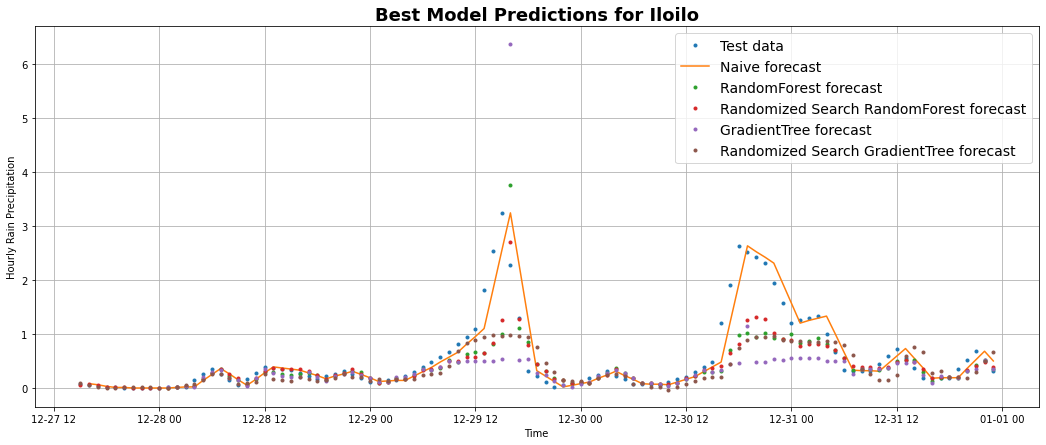

In [74]:
plt.figure(figsize=(18, 7))
offset = 10 # offset the values by 300 timesteps 
plot_time_series(timesteps=X_time_test,  values=y_test, label="Test data")
plot_time_series(timesteps=X_time_test[1:], values=naive_forecast, format="-",  label="Naive forecast")
plot_time_series(timesteps=X_time_test, start=offset, values=rs_forecast, label='RandomForest forecast')
plot_time_series(timesteps=X_time_test,  values=rs_ideal_forecast, label='Randomized Search RandomForest forecast')
# plot_time_series(timesteps=X_time_test, start=offset, values=k_forecast, label='KNR forecast')
# plot_time_series(timesteps=X_time_test, start=offset, values=rs_k_forecast, label='Ideal KNR forecast')
# plot_time_series(timesteps=X_time_test, start=offset, values=svr_forecast, label='SVR forecast')
# plot_time_series(timesteps=X_time_test, start=offset, values=rs_svr_forecast, label='Ideal SVR forecast')
# plot_time_series(timesteps=X_time_test, start=offset, values=vr_forecast, label='VotingRegressor forecast')
plot_time_series(timesteps=X_time_test, start=offset, values=gbr_forecast, label='GradientTree forecast')
plot_time_series(timesteps=X_time_test, values=rs_gbr_forecast, label='Randomized Search GradientTree forecast')
plt.title('Best Model Predictions for Iloilo', fontsize=18, fontweight='bold')

plt.show();

 ### Feature importance

In [75]:
rs_model.best_params_

{'max_depth': 10,
 'max_features': 'auto',
 'max_samples': 332,
 'min_samples_leaf': 3,
 'min_samples_split': 18,
 'n_estimators': 70}

In [76]:
# best_rs_model = RandomForestRegressor(
#     n_jobs=-1,
#     max_depth=30,
#     max_features='auto',
#     max_samples=416,
#     min_samples_leaf=10,
#     min_samples_split=40,
#     n_estimators=200
# )

# best_rs_model.fit(X_train, y_train)
np.random.seed(1)
best_rs_model = RandomForestRegressor(
    n_jobs=-1,
    max_depth=150,
    max_features='auto',
    max_samples=416,
    min_samples_leaf=10,
    min_samples_split=60,
    n_estimators=700
)

best_rs_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=150, max_samples=416, min_samples_leaf=10,
                      min_samples_split=60, n_estimators=700, n_jobs=-1)

In [77]:
best_rs_scores = show_scores_sklearn(best_rs_model)
best_rs_scores

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


{'mae': 0.2059499962206294,
 'mape': 910361206506.7616,
 'mse': 0.15569557720145136,
 'rmse': 0.3945827887800624,
 'train_mae': 0.08743100592517482,
 'train_mape': 8464580601329.007,
 'train_mse': 0.2152750326976146,
 'train_rmse': 0.4639774053740275}

In [78]:
scores

,models,mae,mape,mse,rmse
0,Naive,0.149135,9.619386e+04,0.070655,0.265810
1,Random Forest,0.247820,1.749970e+12,0.249441,0.499440
2,Random Forest Randomized Search,0.227049,1.045875e+12,0.203688,0.451318
3,KNeighboursRegressor,0.465543,1.166647e+13,0.646726,0.804193
4,KNeighboursRegressor Randomized Search,0.436333,1.295321e+13,0.596374,0.772253
5,Support Vector Regression,0.458923,2.129633e+13,0.658355,0.811391
6,Support Vector Regression Randomized Search,0.506515,1.212257e+14,0.475399,0.689492
7,VotingRegressor,0.334178,3.823115e+13,0.370336,0.608553
8,GradientTreeBoosting Regressor,0.323240,2.263976e+12,0.514721,0.717441
9,GradientTreeBoosting Regressor Randomized Search,0.286966,2.353587e+12,0.275676,0.525048


In [79]:
models.append('Random Forest Manually Tuned')

mae.append(best_rs_scores['mae'])
mape.append(best_rs_scores['mape'])
mse.append(best_rs_scores['mse']) 
rmse.append(best_rs_scores['rmse'])

scores = pd.DataFrame(
    data={
        'models': models,
        'mae': mae,
        'mape': mape,
        'mse': mse,
        'rmse': rmse,
    }    
)

scores

,models,mae,mape,mse,rmse
0,Naive,0.149135,9.619386e+04,0.070655,0.265810
1,Random Forest,0.247820,1.749970e+12,0.249441,0.499440
2,Random Forest Randomized Search,0.227049,1.045875e+12,0.203688,0.451318
3,KNeighboursRegressor,0.465543,1.166647e+13,0.646726,0.804193
4,KNeighboursRegressor Randomized Search,0.436333,1.295321e+13,0.596374,0.772253
5,Support Vector Regression,0.458923,2.129633e+13,0.658355,0.811391
6,Support Vector Regression Randomized Search,0.506515,1.212257e+14,0.475399,0.689492
7,VotingRegressor,0.334178,3.823115e+13,0.370336,0.608553
8,GradientTreeBoosting Regressor,0.323240,2.263976e+12,0.514721,0.717441
9,GradientTreeBoosting Regressor Randomized Search,0.286966,2.353587e+12,0.275676,0.525048


In [80]:
best_rs_forecast = best_rs_model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


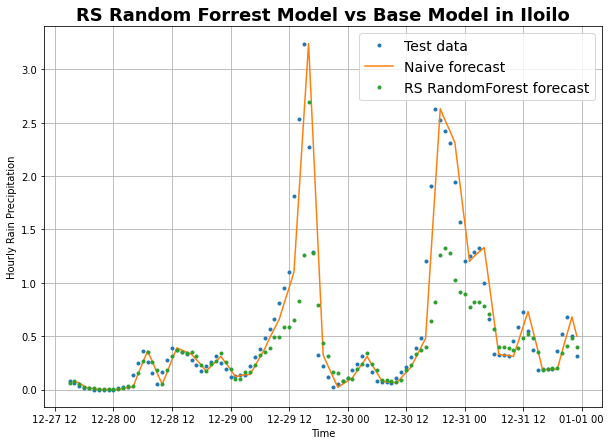

In [83]:
plt.figure(figsize=(10, 7))
offset = 10 # offset the values by 300 timesteps 
plot_time_series(timesteps=X_time_test,  values=y_test, label="Test data")
plot_time_series(timesteps=X_time_test[1:], values=naive_forecast, format="-",  label="Naive forecast")
# plot_time_series(timesteps=X_time_test, start=offset, values=rs_forecast, label='RandomForest forecast')
plot_time_series(timesteps=X_time_test,  values=rs_ideal_forecast, label='RS RandomForest forecast')
# plot_time_series(timesteps=X_time_test, start=offset, values=k_forecast, label='KNR forecast')
# plot_time_series(timesteps=X_time_test, start=offset, values=rs_k_forecast, label='Ideal KNR forecast')
# plot_time_series(timesteps=X_time_test, start=offset, values=svr_forecast, label='SVR forecast')
# plot_time_series(timesteps=X_time_test, start=offset, values=rs_svr_forecast, label='Ideal SVR forecast')
# plot_time_series(timesteps=X_time_test, start=offset, values=vr_forecast, label='VotingRegressor forecast')
# plot_time_series(timesteps=X_time_test, start=offset, values=gbr_forecast, label='GradientTree forecast')
# plot_time_series(timesteps=X_time_test, values=rs_gbr_forecast, label='Randomized Search GradientTree forecast')
# plot_time_series(timesteps=X_time_test, values=best_rs_forecast, label='Best RandomForest forecast')
plt.title('RS Random Forrest Model vs Base Model in Iloilo', fontsize=18, fontweight='bold')

plt.show();

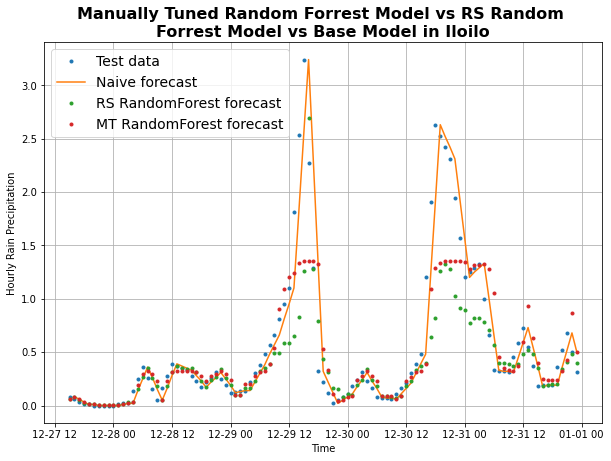

In [84]:
plt.figure(figsize=(10, 7))
offset = 10 # offset the values by 300 timesteps 
plot_time_series(timesteps=X_time_test,  values=y_test, label="Test data")
plot_time_series(timesteps=X_time_test[1:], values=naive_forecast, format="-",  label="Naive forecast")
# plot_time_series(timesteps=X_time_test, start=offset, values=rs_forecast, label='RandomForest forecast')
plot_time_series(timesteps=X_time_test,  values=rs_ideal_forecast, label='RS RandomForest forecast')
# plot_time_series(timesteps=X_time_test, start=offset, values=k_forecast, label='KNR forecast')
# plot_time_series(timesteps=X_time_test, start=offset, values=rs_k_forecast, label='Ideal KNR forecast')
# plot_time_series(timesteps=X_time_test, start=offset, values=svr_forecast, label='SVR forecast')
# plot_time_series(timesteps=X_time_test, start=offset, values=rs_svr_forecast, label='Ideal SVR forecast')
# plot_time_series(timesteps=X_time_test, start=offset, values=vr_forecast, label='VotingRegressor forecast')
# plot_time_series(timesteps=X_time_test, start=offset, values=gbr_forecast, label='GradientTree forecast')
# plot_time_series(timesteps=X_time_test, values=rs_gbr_forecast, label='Randomized Search GradientTree forecast')
plot_time_series(timesteps=X_time_test, values=best_rs_forecast, label='MT RandomForest forecast')
plt.title('Manually Tuned Random Forrest Model vs RS Random \nForrest Model vs Base Model in Iloilo', fontsize=16, fontweight='bold')

plt.show();

In [ ]:
best_rs_model.feature_importances_

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.13090122e-07, 0.00000000e+00, 3.53086140e-10, 9.72896734e-07,
       2.94809625e-07, 0.00000000e+00, 5.93495072e-01, 2.89943991e-06,
       5.86219083e-07, 2.50129101e-07, 0.00000000e+00, 7.45160898e-08,
       0.00000000e+00, 0.00000000e+00, 4.64257949e-07, 6.83248831e-07,
       7.87407536e-07, 3.26203330e-01, 5.43023348e-02, 1.93174604e-02,
       3.99258266e-03, 2.68003475e-03, 6.48017540e-07, 1.31177054e-06])

In [ ]:
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({
        'features': columns,
        'feature_importances': importances
    }).sort_values('feature_importances', ascending=False).reset_index(drop=True))

    #plot df
    fig, ax = plt.subplots()
    ax.barh(df['features'][:n], df['feature_importances'][:n])
    ax.set_ylabel('Features')
    ax.set_xlabel('Feature Importance')
    ax.invert_yaxis()
    plt.title('Feature Importance in Iloilo', fontweight='bold', fontsize=14)

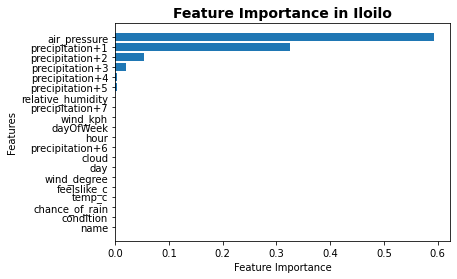

In [ ]:
plot_features(X_columns, best_rs_model.feature_importances_)

In [ ]:
scores

,models,mae,mape,mse,rmse
0,Naive,0.149135,9.619386e+04,0.070655,0.265810
1,Random Forest,0.247820,1.749970e+12,0.249441,0.499440
2,Random Forest Randomized Search,0.227049,1.045875e+12,0.203688,0.451318
3,KNeighboursRegressor,0.465543,1.166647e+13,0.646726,0.804193
4,KNeighboursRegressor Randomized Search,0.436333,1.295321e+13,0.596374,0.772253
5,Support Vector Regression,0.458923,2.129633e+13,0.658355,0.811391
6,Support Vector Regression Randomized Search,0.506515,1.212257e+14,0.475399,0.689492
7,VotingRegressor,0.334178,3.823115e+13,0.370336,0.608553
8,GradientTreeBoosting Regressor,0.323240,2.263976e+12,0.514721,0.717441
9,GradientTreeBoosting Regressor Randomized Search,0.286966,2.353587e+12,0.275676,0.525048
